In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-weekly-trends-south-america/covid_south_america_weekly_trend.csv


# import necessary libraries & Load dataset

In [197]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
covid_data=pd.read_csv('../input/covid-weekly-trends-south-america/covid_south_america_weekly_trend.csv')
covid_data.head(3)

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Argentina,45210,43308,4,982,78,78,0,2.0,46057604
1,Bolivia,34100,33748,1,2841,40,39,3,3.0,12003930
2,Brazil,234840,282150,-17,1089,1579,1662,-5,7.0,215699141


# Data Preparation and Cleaning

Removing dublicate values and copying the data keeping raw data safe renaming the column

In [198]:
covid_data.rename(columns={'Country/Other':'Country'},inplace=True)
covid_data

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Argentina,45210,43308,4,982,78,78,0,2.0,46057604
1,Bolivia,34100,33748,1,2841,40,39,3,3.0,12003930
2,Brazil,234840,282150,-17,1089,1579,1662,-5,7.0,215699141
3,Chile,56701,49569,14,2914,239,257,-7,12.0,19457190
4,Colombia,7782,20727,-62,150,105,239,-56,2.0,52009944
5,Ecuador,5762,19356,-70,317,8,19,-58,0.4,18199823
6,Falkland Islands,0,4,-100,0,0,0,0,0.0,3691
7,French Guiana,763,891,-14,2424,3,2,50,10.0,314771
8,Guyana,366,496,-26,461,1,3,-67,1.0,794438
9,Paraguay,3457,9588,-64,473,40,70,-43,5.0,7314613


In [199]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           14 non-null     object 
 1   Cases in the last 7 days          14 non-null     int64  
 2   Cases in the preceding 7 days     14 non-null     int64  
 3   Weekly Case % Change              14 non-null     int64  
 4   Cases in the last 7 days/1M pop   14 non-null     int64  
 5   Deaths in the last 7 days         14 non-null     int64  
 6   Deaths in the preceding 7 days    14 non-null     int64  
 7   Weekly Death % Change             14 non-null     int64  
 8   Deaths in the last 7 days/1M pop  14 non-null     float64
 9   Population                        14 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.2+ KB


In [200]:
covid_data.shape

(14, 10)

In [201]:
covid_data.duplicated().value_counts()

False    14
dtype: int64

In [202]:
covid_data.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,1.400000e+01
mean,33075.500000,39147.714286,-28.071429,1023.500000,171.50000,187.857143,-21.214286,3.971429,3.129617e+07
std,62752.119917,74177.200025,34.735183,1071.717296,415.55556,434.832922,35.951203,3.965123,5.582321e+07
min,0.000000,4.000000,-100.000000,0.000000,0.00000,0.000000,-67.000000,0.000000,3.691000e+03
25%,1011.000000,1170.000000,-57.250000,191.750000,3.75000,4.500000,-54.500000,1.250000,1.470514e+06
50%,4609.500000,14472.000000,-17.000000,487.500000,24.00000,29.000000,-20.000000,2.000000,1.510188e+07
75%,42432.500000,40918.000000,-2.500000,1806.750000,98.25000,192.750000,0.000000,6.500000,3.251193e+07
max,234840.000000,282150.000000,14.000000,2914.000000,1579.00000,1662.000000,50.000000,12.000000,2.156991e+08


# Exploratory Analysis and Visualization

In [203]:
covid_data.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,1.400000e+01
mean,33075.500000,39147.714286,-28.071429,1023.500000,171.50000,187.857143,-21.214286,3.971429,3.129617e+07
std,62752.119917,74177.200025,34.735183,1071.717296,415.55556,434.832922,35.951203,3.965123,5.582321e+07
min,0.000000,4.000000,-100.000000,0.000000,0.00000,0.000000,-67.000000,0.000000,3.691000e+03
25%,1011.000000,1170.000000,-57.250000,191.750000,3.75000,4.500000,-54.500000,1.250000,1.470514e+06
50%,4609.500000,14472.000000,-17.000000,487.500000,24.00000,29.000000,-20.000000,2.000000,1.510188e+07
75%,42432.500000,40918.000000,-2.500000,1806.750000,98.25000,192.750000,0.000000,6.500000,3.251193e+07
max,234840.000000,282150.000000,14.000000,2914.000000,1579.00000,1662.000000,50.000000,12.000000,2.156991e+08


In [204]:
#The five countries with the highest infection rates
country=covid_data.groupby('Country')
country['Weekly Case % Change'].max().sort_values(ascending=False).head()

Country
Chile        14
Venezuela    14
Argentina     4
Bolivia       1
Uruguay     -13
Name: Weekly Case % Change, dtype: int64

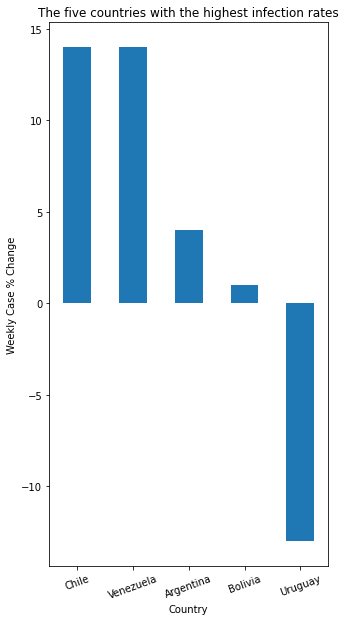

In [205]:
#The five countries with the highest infection rates
plt.figure(figsize=(5,10))
country['Weekly Case % Change'].max().sort_values(ascending=False).head().plot.bar()
plt.xticks(rotation=20)
plt.xlabel("Country")
plt.ylabel("Weekly Case % Change")
plt.title('The five countries with the highest infection rates')
plt.show()

In [206]:
country[['Cases in the last 7 days','Cases in the preceding 7 days']].mean().head()

,Cases in the last 7 days,Cases in the preceding 7 days
Country,,
Argentina,45210.0,43308.0
Bolivia,34100.0,33748.0
Brazil,234840.0,282150.0
Chile,56701.0,49569.0
Colombia,7782.0,20727.0


<Figure size 360x720 with 0 Axes>

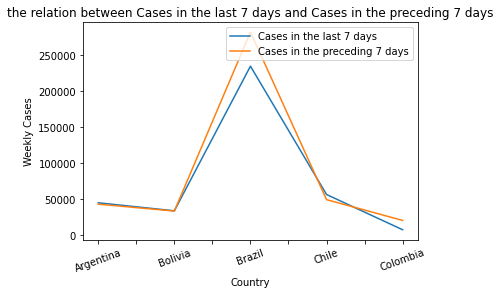

In [207]:
#the relation between Cases in the last 7 days and Cases in the preceding 7 days
plt.figure(figsize=(5,10))
country[['Cases in the last 7 days','Cases in the preceding 7 days']].mean().head().plot.line()
plt.xticks(rotation=20)
plt.xlabel("Country")
plt.ylabel("Weekly Cases")
plt.title('the relation between Cases in the last 7 days and Cases in the preceding 7 days')
plt.show()

In [208]:
country['Weekly Death % Change'].max().sort_values(ascending=False).head(3)

Country
French Guiana    50
Peru             27
Bolivia           3
Name: Weekly Death % Change, dtype: int64

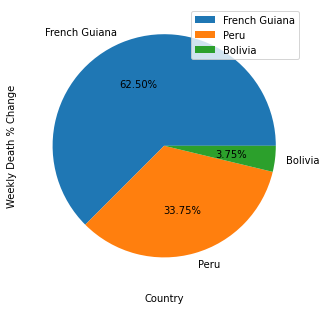

In [209]:
plt.figure(figsize=(5,10))
country['Weekly Death % Change'].max().sort_values(ascending=False).head(3).plot.pie(autopct="%.2f%%")
plt.legend()
plt.xlabel("Country")
plt.ylabel('Weekly Death % Change')
plt.show()

In [210]:
country['Cases in the last 7 days/1M pop'].max().sort_values(ascending=False).head()

Country
Chile            2914
Bolivia          2841
French Guiana    2424
Peru             2046
Brazil           1089
Name: Cases in the last 7 days/1M pop, dtype: int64

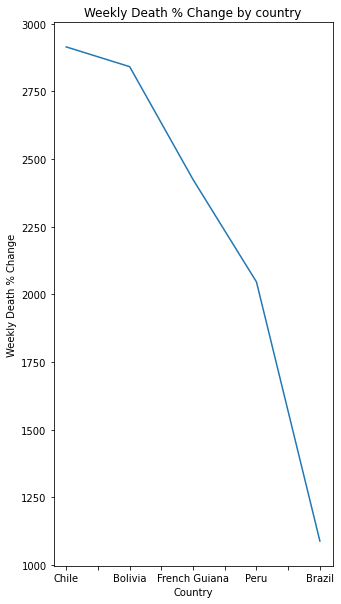

In [211]:
#Weekly Death % Change by country
plt.figure(figsize=(5,10))
country['Cases in the last 7 days/1M pop'].max().sort_values(ascending=False).head().plot.line()
plt.xlabel("Country")
plt.ylabel('Weekly Death % Change')
plt.title('Weekly Death % Change by country')
plt.show()

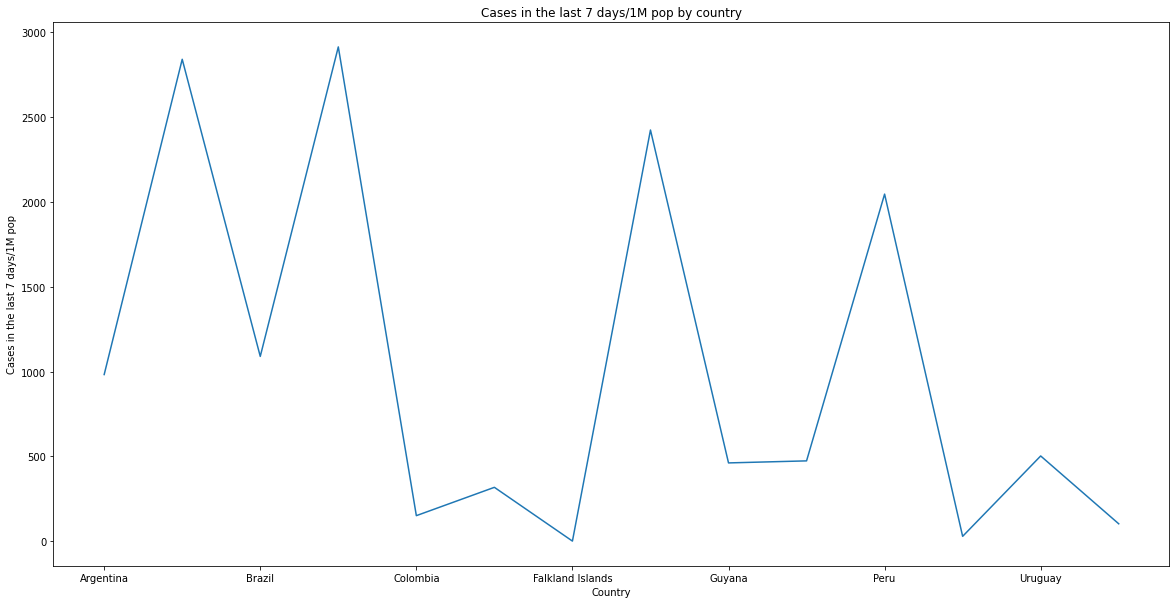

In [212]:
#Cases in the last 7 days/1M pop by country
plt.figure(figsize=(20,10))
country['Cases in the last 7 days/1M pop'].sum().plot.line()
plt.xlabel("Country")
plt.ylabel('Cases in the last 7 days/1M pop')
plt.title('Cases in the last 7 days/1M pop by country')
plt.show()

In [213]:
country['Deaths in the last 7 days/1M pop'].max().sort_values(ascending=False).head()

Country
Chile            12.0
French Guiana    10.0
Peru              9.0
Brazil            7.0
Paraguay          5.0
Name: Deaths in the last 7 days/1M pop, dtype: float64

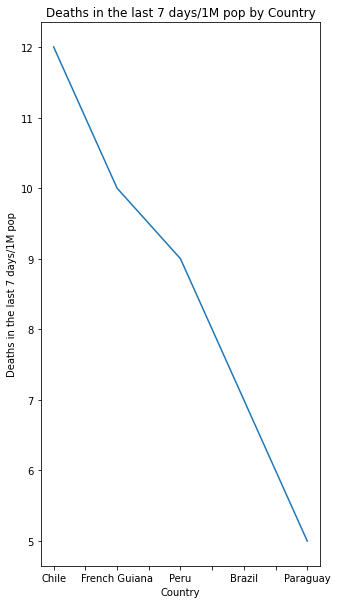

In [214]:
#Deaths in the last 7 days/1M pop by Country
plt.figure(figsize=(5,10))
country['Deaths in the last 7 days/1M pop'].max().sort_values(ascending=False).head().plot.line()
plt.xlabel("Country")
plt.ylabel('Deaths in the last 7 days/1M pop')
plt.title('Deaths in the last 7 days/1M pop by Country')
plt.show()

Text(0.5, 1.0, 'the relation between Weekly Case Change and Weekly Death Change')

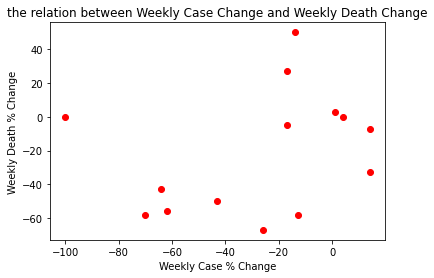

In [215]:
#the relation between Weekly Case Change and Weekly Death Change
x=covid_data['Weekly Case % Change']
y=covid_data['Weekly Death % Change']
plt.xlabel('Weekly Case % Change')
plt.ylabel('Weekly Death % Change')
plt.scatter(x,y,color="red")
plt.title("the relation between Weekly Case Change and Weekly Death Change")

Text(0.5, 1.0, 'the relation between Cases in the last 7 days and Deaths in the last 7 days')

<Figure size 14400x1440 with 0 Axes>

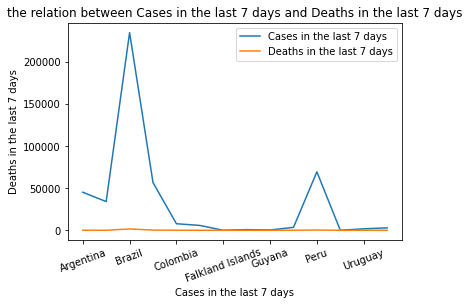

In [216]:
#the relation between Cases in the last 7 days and Deaths in the last 7 daysthe relation between Cases in the last 7 days and Deaths in the last 7 days
plt.figure(figsize=(200,20))
country[['Cases in the last 7 days','Deaths in the last 7 days']].sum().plot.line()
plt.xticks(rotation=20)
plt.xlabel('Cases in the last 7 days')
plt.ylabel('Deaths in the last 7 days')
plt.title("the relation between Cases in the last 7 days and Deaths in the last 7 days")